# PCA Intuition Tutorial

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [116]:
#dummy data
num_points = 20
def random_func(start, stop, step, num_points):
    return list(np.random.choice(np.arange(start, stop, step), num_points))

cholesterol = np.array(random_func(2, 5, 0.02, num_points) + random_func(3, 6, 0.02, num_points))
smoking_freq = np.array(random_func(2, 5, 0.02, num_points) + random_func(3, 6, 0.02, num_points))
heart_disease = [] #hot encoding
for i in range(2 * num_points):
    if cholesterol.item(i) + smoking_freq.item(i) >= 8:
        heart_disease.append(1)
    else: 
        heart_disease.append(0)
data = pd.DataFrame(data={"cholesterol": cholesterol, "smoking_freq": smoking_freq, "heart_disease": heart_disease})
data.head()

,cholesterol,heart_disease,smoking_freq
0,3.16,0,4.52
1,4.50,1,3.92
2,2.62,0,3.86
3,3.00,0,4.94
4,3.40,1,4.60


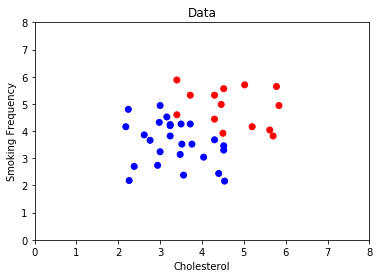

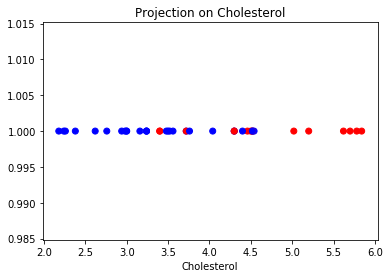

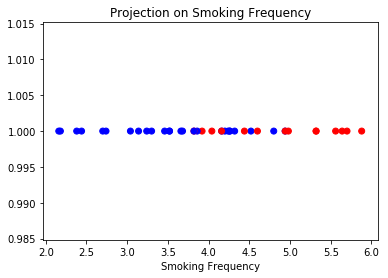

In [117]:
colormap = ["blue", "red"]
plt.scatter(cholesterol, smoking_freq, c=[colormap[item] for item in heart_disease])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.title("Data")
plt.xlabel("Cholesterol")
plt.ylabel("Smoking Frequency")
plt.show()

plt.scatter(cholesterol, len(cholesterol) * [1], c = [colormap[item] for item in heart_disease])
plt.title("Projection on Cholesterol")
plt.xlabel("Cholesterol")
plt.show()


plt.scatter(smoking_freq, len(smoking_freq) * [1], c = [colormap[item] for item in heart_disease])
plt.title("Projection on Smoking Frequency")
plt.xlabel("Smoking Frequency")
plt.show()

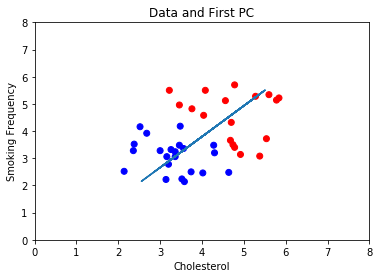

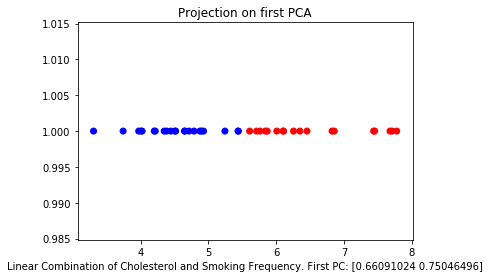

In [114]:
from sklearn.decomposition import PCA

D = data.drop(['heart_disease'], axis = 1).values
means = np.mean(D, axis=0)
first_pc = PCA(n_components=1).fit(D).components_[0]
line = np.outer((D - means) @ first_pc, first_pc) + means

plt.plot(line[:, 0], line[:, 1])
plt.scatter(cholesterol, smoking_freq, c=[colormap[item] for item in heart_disease])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.title("Data and First PC")
plt.xlabel("Cholesterol")
plt.ylabel("Smoking Frequency")
plt.show()

plt.scatter([np.sum(point * first_pc) for point in line], len(line) * [1], c = [colormap[item] for item in heart_disease])
plt.title("Projection on first PCA")
plt.xlabel("Linear Combination of Cholesterol and Smoking Frequency. First PC: " + str(first_pc))
plt.show()

## Random Visualizations for Demos

In [127]:
dataset = {}
dataset["age"] = np.random.choice(np.arange(10, 30), 5)
dataset["height(ft)"] = np.random.choice(6, 5)
dataset["height(in)"] = dataset["height(ft)"] * 12
dataset["weight(lbs)"] = np.random.choice(np.arange(30, 150), 5)
dataset["left foot size (in)"] = np.random.choice(np.arange(12, 16, 0.05), 5)
dataset["right foot size (in)"] = dataset["left foot size (in)"] + np.random.choice(np.arange(-0.03, 0.03, 0.01), 5)
dataset["Body Temperature (F)"] = np.random.choice(np.arange(96, 99, 0.05), 5)
dataframe = pd.DataFrame(data=dataset)
dataframe

,Body Temperature (F),age,height(ft),height(in),left foot size (in),right foot size (in),weight(lbs)
0,97.00,23,5,60,13.85,13.82,121
1,97.35,22,3,36,14.80,14.79,60
2,97.45,15,2,24,15.85,15.86,128
3,96.10,27,4,48,13.10,13.10,129
4,96.35,12,4,48,13.60,13.60,65


In [142]:
D = dataframe.values
U, S, V_t = np.linalg.svd(D - np.mean(D, axis=0))
display(np.around(U, 2))
display(np.around(np.diag(S), 2))
display(np.around(V_t.T, 2))

array([[-0.3 , -0.59, -0.13,  0.59,  0.45],
       [ 0.58,  0.19,  0.59,  0.28,  0.45],
       [-0.38,  0.74, -0.28,  0.15,  0.45],
       [-0.41, -0.19,  0.43, -0.64,  0.45],
       [ 0.51, -0.16, -0.61, -0.37,  0.45]])

array([[70.09,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , 27.98,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , 10.27,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.88,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

array([[ 0.  ,  0.02,  0.01,  0.52,  0.85, -0.  , -0.05],
       [-0.07, -0.18,  0.98,  0.03, -0.02,  0.  ,  0.  ],
       [-0.  , -0.08, -0.02,  0.01,  0.05, -0.35,  0.93],
       [-0.02, -0.97, -0.19,  0.09, -0.03,  0.03, -0.08],
       [-0.  ,  0.07, -0.02,  0.6 , -0.39, -0.66, -0.22],
       [-0.  ,  0.07, -0.02,  0.59, -0.35,  0.67,  0.27],
       [-1.  ,  0.03, -0.06, -0.  ,  0.  , -0.  , -0.  ]])

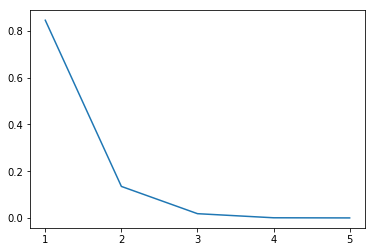

In [164]:
scree_plot = S**2 / np.sum(S**2)
plt.plot(np.arange(1, 6), scree_plot)
plt.xticks(np.arange(1, 6))
plt.show()